In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | On March 1st, I flew from Ber..."
1,Not Verified | The WORST customer experience! ...
2,Not Verified | Had to cancel my flight month...
3,✅ Trip Verified | Flight cancelled with no rea...
4,✅ Trip Verified | This is a route I fly regula...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]



In [ ]:
df


,reviews
0,"On March 1st, I flew from Berlin to São Pau..."
1,The WORST customer experience! British Airway...
2,Had to cancel my flight months in advance d...
3,Flight cancelled with no reason given less th...
4,This is a route I fly regularly. Used first c...
...,...
995,London to Milan. Evening outbound flight wit...
996,The connecting flight to Johannesburg was on...
997,London Heathrow to Los Angeles. Very nice exp...
998,CPT is definitely getting its act together: B...


In [ ]:
import re


def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text


df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Paulo w...
1,The WORST customer experience! British Airway...,The WORST customer experience British Airways...
2,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...
3,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...
4,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...


In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
  
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          
          
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ..."
1,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (..."
2,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan..."
3,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi..."
4,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ...",March st fly Berlin Paulo BA encounter sever...
1,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...
2,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...
3,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...
4,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"On March 1st, I flew from Berlin to São Pau...",March st fly Berlin Paulo BA encounter sever...
1,The WORST customer experience! British Airway...,WORST customer experience British Airways BA...
2,Had to cancel my flight months in advance d...,cancel flight month advance due change sched...
3,Flight cancelled with no reason given less th...,Flight cancel reason give less h departure e...
4,This is a route I fly regularly. Used first c...,route fly regularly Used first class securit...
...,...,...
995,London to Milan. Evening outbound flight wit...,London Milan Evening outbound flight board s...
996,The connecting flight to Johannesburg was on...,connect flight Johannesburg older proper bus...
997,London Heathrow to Los Angeles. Very nice exp...,London Heathrow Los Angeles nice experience ...
998,CPT is definitely getting its act together: B...,CPT definitely get act together BA Galleries...


Sentiment Analysis


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ...",March st fly Berlin Paulo BA encounter sever...,-0.9183,Negative
1,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...,-0.6940,Negative
2,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...,-0.4939,Negative
3,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...,-0.9698,Negative
4,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...,0.9571,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    471
Negative    421
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b67e8066dd0>,
 [Text(0.10007827270333483, 1.0954379669030634, 'Positive'),
  Text(-0.4589560614029004, -0.9996796155276636, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.054588148747273545, 0.5975116183107618, '47.1%'),
  Text(-0.25033966985612743, -0.5452797902878165, '42.1%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

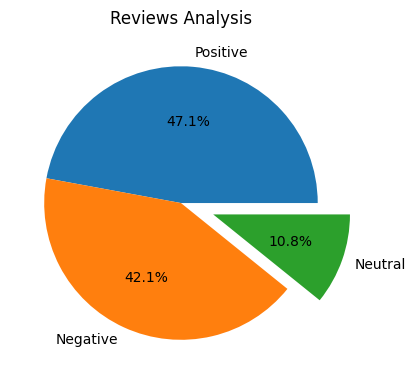

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

WordCloud

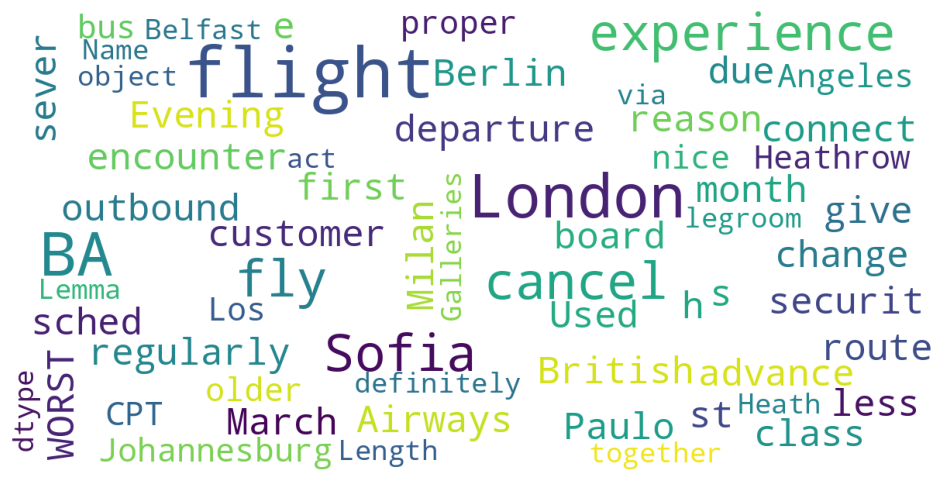

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)